<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE</span></p>
<p><font size="4"> UE Stochatic Dynamical Systems </font></p>
<p></p>
<p><font size="5">  LAB - Gaussian processes - Identification of a complex oscillating system - Statement </font>
</p></br>
</p>
</CENTER>

----------------------------

# <span style="color:#00B8DE"> I - Gaussian processes </span>


1) Implement a function **GP(x,dataX,dataY;σx=σx,σf=σf,σy=σy)**, where

>- x: points where the regression will be calculated
>- dataX, dataY: data observed on x and y axis respectively
>- σx,σf: the covariance kernel will be $k(x_1,x_2)=σ_f^2\exp((-(x_1-x_2)^2/2σ_x^2)$
>- σy: for noisy data the data kernel will be $k_d(x_1,x_2)=σ_f^2\exp((-(x_1-x_2)^2/2σ_x^2)+σ_y^2\delta_{x_1,x_2}$

and, for outputs, **μy** and **Cy**, the mean and covariance matrix for the posterior distribution of approximation curve at points **x**.

2) Let $y=\dfrac{1}{1+x^2}$ and $x\in[-2,2]$. Test the cases of regularly sampled $x$ and randomly sampled $x$ without and with noise with gaussian distribution and std $\sigma_y=.05$. Set for instance $\sigma_f=.5$ and $\sigma_x=.5$. 

3) Implement maximum likelihood estimation for parameters and plot the corresponding mean posterior approximating curve together with the initial curve.


In [77]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [69]:
# 1

# Bayesian interpolation based on Gaussian process prior

def GP(x, dataX, dataY, sigx=1.0, sigf=1.0, sigy=1e-6):
    # Kernel functions
    def kernel(x1, x2):
        return sigf**2 * np.exp(-0.5 * (x1 - x2)**2 / sigx**2)

    def data_kernel(x1, x2):
        return kernel(x1, x2) + (sigy**2 if x1 == x2 else 0)

    n = len(dataX)
    K = np.zeros((n, n))
    K_star = np.zeros((n, len(x)))

    for i in range(n):
        for j in range(n):
            K[i, j] = data_kernel(dataX[i], dataX[j])

        for j in range(len(x)):
            K_star[i, j] = kernel(dataX[i], x[j])

    K_inv = np.linalg.inv(K + sigy**2 * np.eye(n))
    muy = K_star.T @ K_inv @ dataY
    Cy = kernel(x, x) - K_star.T @ K_inv @ K_star

    return muy, Cy

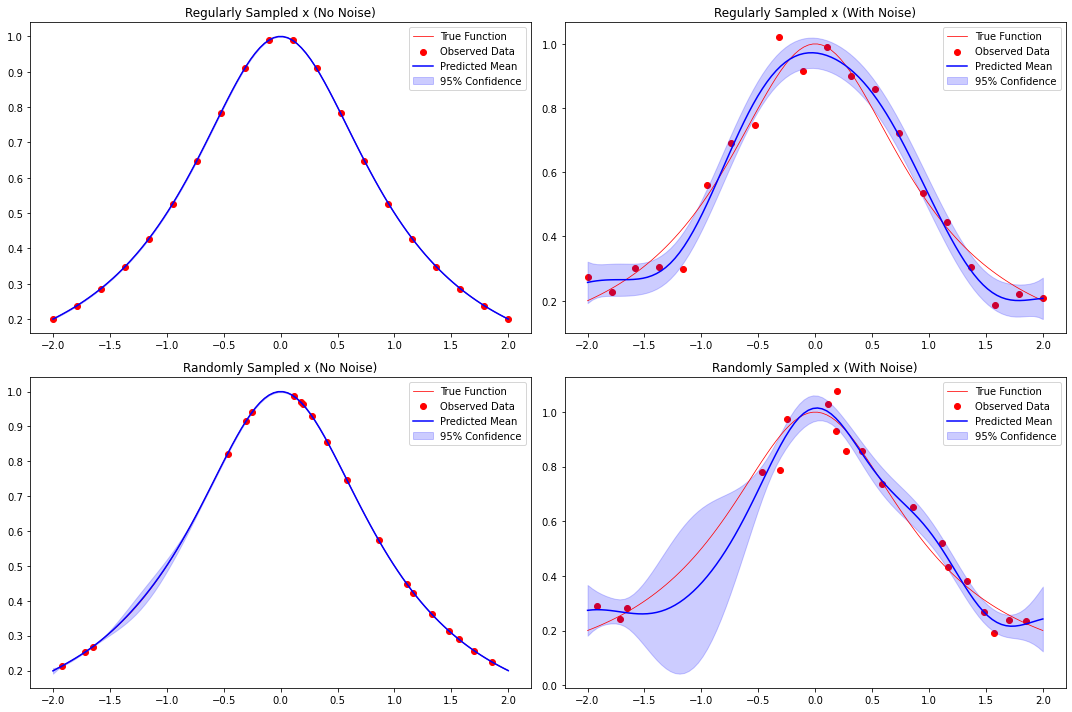

In [75]:
# 2

# Define parameters
sigx = 0.5
sigf = 0.5
sigy = 0.05
T = 2
n_sample = 20
n_pts = 100

# Define the true function
def true_function(x):
    return 1 / (1 + x**2)

# Generate data points
np.random.seed(0)
regular_x = np.linspace(-T, T, n_sample)  # Regularly sampled x
random_x = np.sort(np.random.uniform(-T, T, n_sample))  # Randomly sampled x

# Generate corresponding y values
y_regular = true_function(regular_x)
y_random = true_function(random_x)

# Apply GP regression for regular x without noise
x_regular_test = np.linspace(-T, T, n_pts)  # Test points
muy_regular, Cy_regular = GP(x_regular_test, regular_x, y_regular, sigx, sigf)

# Apply GP regression for random x without noise
x_random_test = np.linspace(-T, T, n_pts)  # Test points
muy_random, Cy_random = GP(x_random_test, random_x, y_random, sigx, sigf)

# Add noise to the data
noise = np.random.normal(0, sigy, len(y_random))
y_regular_noisy = y_regular + noise
y_random_noisy = y_random + noise

# Apply GP regression for regular x with noise
x_regular_test = np.linspace(-T, T, n_pts)  # Test points
muy_regular_noisy, Cy_regular_noisy = GP(x_regular_test, regular_x, y_regular_noisy, sigx, sigf, sigy)

# Apply GP regression for random x with noise
muy_random_noisy, Cy_random_noisy = GP(x_random_test, random_x, y_random_noisy, sigx, sigf, sigy)

# Plot results
plt.figure(figsize=(15, 10))

# Plot GP regression for regularly sampled x without noise
plt.subplot(221)
plt.plot(x_regular_test, true_function(x_regular_test),color='red', linewidth='0.75', label='True Function')
plt.scatter(regular_x, y_regular, color='red', label='Observed Data')
plt.plot(x_regular_test, muy_regular,color='blue', label='Predicted Mean')
plt.fill_between(x_regular_test, muy_regular - np.sqrt(np.absolute(np.diag(Cy_regular))), muy_regular + np.sqrt(np.absolute(np.diag(Cy_regular))), alpha=0.2, color='blue', label='95% Confidence')
plt.title('Regularly Sampled x (No Noise)')
plt.legend()

# Plot GP regression for regularly sampled x with noise
plt.subplot(222)
plt.plot(x_regular_test, true_function(x_regular_test),color='red', linewidth='0.75', label='True Function')
plt.scatter(regular_x, y_regular_noisy, color='red', label='Observed Data')
plt.plot(x_regular_test, muy_regular_noisy,color='blue', label='Predicted Mean')
plt.fill_between(x_regular_test, muy_regular_noisy - np.sqrt(np.absolute(np.diag(Cy_regular_noisy))), muy_regular_noisy + np.sqrt(np.absolute(np.diag(Cy_regular_noisy))), alpha=0.2, color='blue', label='95% Confidence')
plt.title('Regularly Sampled x (With Noise)')
plt.legend()

# Plot GP regression for randomly sampled x without noise
plt.subplot(223)
plt.plot(x_regular_test, true_function(x_regular_test),color='red', linewidth='0.75', label='True Function')
plt.scatter(random_x, y_random, color='red', label='Observed Data')
plt.plot(x_random_test, muy_random,color='blue', label='Predicted Mean')
plt.fill_between(x_random_test, muy_random - np.sqrt(np.absolute(np.diag(Cy_random))), muy_random + np.sqrt(np.absolute(np.diag(Cy_random))), alpha=0.2, color='blue', label='95% Confidence')
plt.title('Randomly Sampled x (No Noise)')
plt.legend()

# Plot GP regression for randomly sampled x with noise
plt.subplot(224)
plt.plot(x_regular_test, true_function(x_regular_test),color='red', linewidth='0.75', label='True Function')
plt.scatter(random_x, y_random_noisy, color='red', label='Observed Data')
plt.plot(x_random_test, muy_random_noisy,color='blue', label='Predicted Mean')
plt.fill_between(x_random_test, muy_random_noisy - np.sqrt(np.absolute(np.diag(Cy_random_noisy))), μy_random_noisy + np.sqrt(np.absolute(np.diag(Cy_random_noisy))), alpha=0.2, color='blue', label='95% Confidence')
plt.title('Randomly Sampled x (With Noise)')
plt.legend()

plt.tight_layout()
plt.show()

# use of the absolute function to avoid negative values inside the sqrt, still coherent results


As we can see the prediction and the confidence area seem to fit most of the data observed and the true function. As it is seen, the noise is a huge factor of error, on the other hand the sampling is not. However, when sampling regularly the confidence area seems to better fit the true function.

Having the noise repartition enables us to have a good estimation of the true function.

/tmp/ipykernel_169469/1274877168.py:28: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -0.5 * (np.log(np.absolute(np.linalg.det(Cy))) + np.dot((y - muy).T, np.linalg.solve(Cy, (y - muy))))


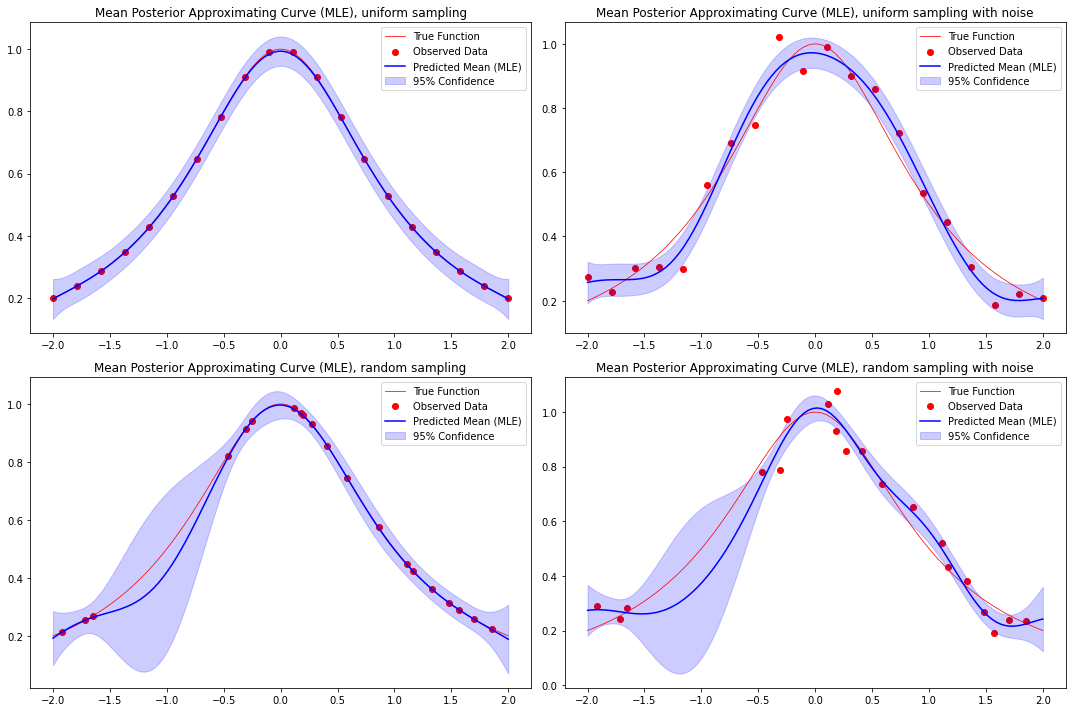

In [120]:
# 3

# Define parameters
sigx = 0.5
sigf = 0.5
sigy = 0.05
T = 2
n_sample = 20
n_pts = 100

# Generate data points
np.random.seed(0)
x_set = np.linspace(-T, T, n_pts) 
x_regular = np.linspace(-T, T, n_sample)  # Regularly sampled x
x_observed = np.sort(np.random.uniform(-T, T, n_sample))  # Randomly sampled x
y_regular = true_function(x_regular)
y_observed = true_function(x_observed)

# Add noise to the data
noise = np.random.normal(0, sigy, len(y_random))
y_regular_noisy = y_regular + noise
y_observed_noisy = y_observed + noise

# Define the negative log-likelihood function
def neg_log_likelihood(params, x, y):
    sigx, sigf, sigy = params
    muy, Cy = GP(x, x_observed, y_observed, sigx, sigf, sigy)
    log_likelihood = -0.5 * (np.log(np.absolute(np.linalg.det(Cy))) + np.dot((y - muy).T, np.linalg.solve(Cy, (y - muy))))
    # absolute has been added to avoid errors in the log, still some problems with division by 0
    return -log_likelihood

# Perform Maximum Likelihood Estimation (MLE)
initial_guess = [0.5, 0.5, 0.05]  # Initial parameter values
result = minimize(neg_log_likelihood, initial_guess, args=(x_observed, y_observed))
result_noisy = minimize(neg_log_likelihood, initial_guess, args=(x_observed, y_observed_noisy))
result_regular = minimize(neg_log_likelihood, initial_guess, args=(x_regular, y_regular))
result_regular_noisy = minimize(neg_log_likelihood, initial_guess, args=(x_regular, y_regular_noisy))

# Extract estimated parameters
sigx_mle, sigf_mle, sigy_mle = result.x
sigx_mle_noisy, sigf_mle_noisy, sigy_mle_noisy = result_noisy.x
sigx_mle_reg, sigf_mle_reg, sigy_mle_reg = result_regular.x
sigx_mle_reg_noisy, sigf_mle_reg_noisy, sigy_mle_reg_noisy = result_regular_noisy.x

# Calculate mean and covariance for the posterior distribution using MLE parameters
muy_mle, Cy_mle = GP(x_test, x_observed, y_observed, sigx_mle, sigf_mle, sigy_mle)
muy_mle_noisy, Cy_mle_noisy = GP(x_test, x_observed, y_observed_noisy, 
                                 sigx_mle_noisy, sigf_mle_noisy, sigy_mle_noisy)
muy_mle_reg, Cy_mle_reg = GP(x_test, x_regular, y_regular, sigx_mle_reg, sigf_mle_reg, sigy_mle_reg)
muy_mle_reg_noisy, Cy_mle_reg_noisy = GP(x_test, x_regular, y_regular_noisy, sigx_mle_reg_noisy, 
                                         sigf_mle_reg_noisy, sigy_mle_reg_noisy)

# Plot results
x_test = np.linspace(-T, T, n_pts)  # Test points
muy_true = true_function(x_test)

plt.figure(figsize=(15, 10))

# Plot the mean posterior approximating curve with MLE parameters
plt.subplot(221)
plt.plot(x_test, muy_true, color='red', linewidth='0.75', label='True Function')
plt.scatter(x_regular, y_regular, color='red', label='Observed Data')
plt.plot(x_test, muy_mle_reg,color='blue', label='Predicted Mean (MLE)')
plt.fill_between(x_test, muy_mle_reg - np.sqrt(np.diag(Cy_mle_reg)), muy_mle_reg + np.sqrt(np.diag(Cy_mle_reg)), alpha=0.2, color='blue', label='95% Confidence')
plt.title('Mean Posterior Approximating Curve (MLE), uniform sampling')
plt.legend()

# Plot the mean posterior approximating curve with MLE parameters
plt.subplot(222)
plt.plot(x_test, muy_true, color='red', linewidth='0.75', label='True Function')
plt.scatter(x_regular, y_regular_noisy, color='red', label='Observed Data')
plt.plot(x_test, muy_mle_reg_noisy,color='blue', label='Predicted Mean (MLE)')
plt.fill_between(x_test, muy_mle_reg_noisy - np.sqrt(np.diag(Cy_mle_reg_noisy)), muy_mle_reg_noisy + np.sqrt(np.diag(Cy_mle_reg_noisy)), alpha=0.2, color='blue', label='95% Confidence')
plt.title('Mean Posterior Approximating Curve (MLE), uniform sampling with noise')
plt.legend()

# Plot the mean posterior approximating curve with MLE parameters
plt.subplot(223)
plt.plot(x_test, muy_true, color='red', linewidth='0.75', label='True Function')
plt.scatter(x_observed, y_observed, color='red', label='Observed Data')
plt.plot(x_test, muy_mle,color='blue', label='Predicted Mean (MLE)')
plt.fill_between(x_test, muy_mle - np.sqrt(np.diag(Cy_mle)), muy_mle + np.sqrt(np.diag(Cy_mle)), alpha=0.2, color='blue', label='95% Confidence')
plt.title('Mean Posterior Approximating Curve (MLE), random sampling')
plt.legend()

# Plot the mean posterior approximating curve with MLE parameters
plt.subplot(224)
plt.plot(x_test, muy_true, color='red', linewidth='0.75', label='True Function')
plt.scatter(x_observed, y_observed_noisy, color='red', label='Observed Data')
plt.plot(x_test, muy_mle_noisy, color='blue', label='Predicted Mean (MLE)')
plt.fill_between(x_test, muy_mle_noisy - np.sqrt(np.diag(Cy_mle_noisy)), muy_mle_noisy + np.sqrt(np.diag(Cy_mle_noisy)), alpha=0.2, color='blue', label='95% Confidence')
plt.title('Mean Posterior Approximating Curve (MLE), random sampling with noise')
plt.legend()

plt.tight_layout()
plt.show()


We have a likelihood function that quantifies how likely the observed data is given the model and its parameters. We can then use optimization techniques to find the parameter values that maximize this likelihood.
Given that we have Gaussian noise, the likelihood function will be proportional to the negative log-likelihood of a multivariate Gaussian distribution.

As we can see the results fit one more time the true function according to the sampling. First thing first, the confidence area is wider than previously. This time the way of sampling has effects on the result, it is due to the use of log-likelihood to get the repartition of the noise with minimization.

This lab shows how to get a model of the true function only with observed and noisy data.

# <span style="color:#00B8DE"> II - Identification of a complex oscillating system </span>

1) Import data file **SINDy_lab_data.jld2**

Data matrix has three lines, for $x_t$, $\dot{x}_t$, $\ddot{x}_t$, and $n=10^4$ columns for regularly sampled  $x_t$, $\dot{x}_t$ and $\ddot{x}_t$ with initial time $t_1=0$ and final time $t_{10^5}=100$.

2) Plot $x_t$ and the phase portrait $t\rightarrow (x_t,\dot{x}_t)$.

3) We look for a possibly nonlinear model in the form $\;{\displaystyle {\ddot {x}}_t = f(x_t,{\dot {x}}_t,t)= g(x_t,{\dot {x}}_t) + \gamma \cos(\omega t)}\;$ where $g$ is unknown, and $\cos(\omega t)$ is the known system input. The normalizing factor $\gamma$ is unknown.

Design a matrix ${\bf F}({\bf x},{\bf \dot{x}},{\bf t})$ with entries $\left[{\bf F}(x_{t_i},\dot{x}_{t_i},t_i)\right]_{i=1:m,j=1:K}$ made of non linear transforms such that

$$\left[{\bf F}(x_{t_i},\dot{x}_{t_i},{t_i})\right]_{i,:} =[x_{t_i},\dot{x}_{t_i},x^2_{t_i},x\dot{x}_{t_i},\dot{x}_{t_i}^2, x^3_{t_i},\ldots,\dot{x}_{t_i}^4, \cos(\omega t_i)].$$
    
The last column only depends on $t$ and models the system input with $\omega=1.2$.

4) To estimate the ODE via SINDy method, compute the vector ${\bf a}$ that is solution of $\parallel {\bf{\ddot{x}}}-{\bf F}({\bf x},{\bf \dot{x}},{\bf t}){\bf a}\parallel^2$. Note that possibly the matrix ${\bf M}$ to be inversed is singular or close to singular and to avoid numerical issues it can be changed to ${\bf M}+\epsilon{\bf I}$, with $\epsilon\ll 1$.

5) Find the ODE that models the system by eliminating negligible coefficients in the vector ${\bf a}$.

6) Compute RK4 solution for this estimated equation and data

- Plot the trajectory
- Plot the phase portrait
- Plot the error for position and speed

7) Predict the trajectory of the solution for $t$ varying from $100$ to $150$ and plot the continuation of the trajectory and of the phase portrait using a different color.


In [198]:
# Importing libraries

import h5py
import matplotlib.pyplot as plt
import numpy as np

In [196]:
# 1

# Load the data
file_id = h5py.File("SINDy_lab_data.jld2", "r") # not working, no data
data = np.asarray(file_id["data"][()])
w = np.array(file_id["ω"][()])

x = data[0,]  # x
dx = data[1, :]  # dx/dt
d2x = data[2, :]  # d2x/dt^2

# Create a time array
t = w * range(len(x))


(<HDF5 object reference>,)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
# 2)

# Plot x
plt.figure(figsize=(10, 6))
plt.plot(t, x, label=r'$x$')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('x vs Time')
plt.legend()
plt.show()

# Plot dx/dt
plt.figure(figsize=(10, 6))
plt.plot(t, dx, label=r'$\dot{x}$')
plt.xlabel('Time')
plt.ylabel(r'$\dot{x}$')
plt.title(r'$\dot{x}$ vs Time')
plt.legend()
plt.show()

# Plot d2x/dt^2
plt.figure(figsize=(10, 6))
plt.plot(t, d2x, label=r'$\ddot{x}$')
plt.xlabel('Time')
plt.ylabel(r'$\ddot{x}$')
plt.title(r'$\ddot{x}$ vs Time')
plt.legend()
plt.show()

# Plot phase portrait (x_t, dx/dt)
plt.figure(figsize=(10, 6))
plt.plot(x, dx, label='Phase Portrait')
plt.xlabel('$x_t$')
plt.ylabel('$\dot{x}_t$')
plt.title('Phase Portrait: $(x_t, \dot{x}_t)$')
plt.legend()
plt.show()


In [199]:
# 3)

# Define parameters
omega = 1.2

# Define a function to generate the row for a given (x, x_dot, t)
def F_row(x, dx, t):
    return np.array([x, dx, x**2, x*dx, dx**2, x**3, dx**3, x**4, dx**4, np.cos(omega*t)])

def F_matrix(x:list, dx:list, t:list):
    F_matrix = np.zeros(len(x),len(F_row(0,0,0)))
    for i, (_x, _dx, _t) in enumerate(zip(x, dx, t)):
        F_matrix[i] = F_row(_x, _dx, _t)
    return F_matrix


[ 1.          2.          1.          2.          4.          1.
  8.          1.         16.          0.82533561]


In [ ]:
# 4) 

# Define epsilon
epsilon = 1e-6

# Define matrix
F = F_matrix(x, dx, t)

# Compute the matrix M
M = np.dot(F.T, F)

# Add epsilon*I to M
M_reg = M + epsilon*np.eye(M.shape[0])

# Compute the vector a
a = np.linalg.solve(M_reg, np.dot(F.T, d2x))

print(a)


### 5)

To find the ODE model, we can eliminate the negligible coefficients in the vector $\mathbf{a}$. Negligible coefficients are those that are close to zero and can be considered as non-contributing terms.

Let's say we've obtained the vector $\mathbf{a}$ with some coefficients:

$$
\mathbf{a} = [a_1, a_2, a_3, \ldots, a_n]
$$

We'll go through the coefficients and eliminate those that are close to zero. The remaining coefficients will be used to construct the ODE.

For example, if we consider coefficients smaller than a threshold $\epsilon$, we can write the ODE as follows:

$$
\ddot{x}_t = a F
= a_1 x_t + a_2 \dot{x}_t + a_3 x^2_t + a_4 x \dot{x}_t + \ldots
$$


In [ ]:
# 6

import numpy as np

# Define the ODE based on the estimated coefficients
def estimated_ode(a, x, dx, t):
    f_row = F_row(x, dx, t)
    return sum([a_coeff*f for a_coeff, f in zip(a, f_row)])

def rk_integration(a, x0, dx0, t_start, t_end, num_points):
    # Define time parameters
    t = np.linspace(t_start, t_end, num_points)
    dt = (t_end - t_start) / num_points

    # Initialize arrays to store results
    x_traj = np.zeros(num_points)
    dx_traj = np.zeros(num_points)

    # Initialize initial conditions
    x_traj[0] = x0
    dx_traj[0] = dx0

    for i in range(1, num_points):
        k1 = dt * dx_traj[i-1]
        k1_dot = dt * estimated_ode(a, x_traj[i-1], dx_traj[i-1], t[i-1])

        k2 = dt * (x_dot_traj[i-1] + 0.5*k1_dot)
        k2_dot = dt * estimated_ode(a, x_traj[i-1] + 0.5*k1, dx_traj[i-1] + 0.5*k1_dot, t[i-1])

        k3 = dt * (dx_traj[i-1] + 0.5*k2_dot)
        k3_dot = dt * estimated_ode(a, x_traj[i-1] + 0.5*k2, dx_traj[i-1] + 0.5*k2_dot, t[i-1])

        k4 = dt * (dx_traj[i-1] + k3_dot)
        k4_dot = dt * estimated_ode(a, x_traj[i-1] + k3, dx_traj[i-1] + k3_dot, t[i-1])

        x_traj[i] = x_traj[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
        dx_traj[i] = dx_traj[i-1] + (k1_dot + 2*k2_dot + 2*k3_dot + k4_dot) / 6

        return x_traj, dx_traj

# Define Parameters
x0 = 0.0
dx0 = 1.0
t_start = 0
t_end = 100
num_points = len(x)    
    
# RK4 integration
x_traj, dx_traj = rk_integration(a, x0, dx0, t_start, t_end, num_points)
    
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='True Position')
plt.plot(t, x_traj, label='Computed Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Trajectory')
plt.legend()
plt.show()

# Plot the phase portrait
plt.figure(figsize=(10, 6))
plt.plot(x, dx, label='True Phase Portrait')
plt.plot(x_traj, dx_traj, label='Computed Phase Portrait')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Portrait')
plt.legend()
plt.show()

# Computing the error
error_position = np.abs(x - x_traj)
error_speed = np.abs(dx - x_dot_traj)

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(t, error_position, label='Position Error')
plt.plot(t, error_speed, label='Speed Error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Error Analysis')
plt.legend()
plt.show()


In [ ]:
# 7

# Define new time parameters for continuation
t_start_cont = 100
t_end_cont = 150
num_points_cont = 1000

# RK4 integration for continuation, use previous integration
x_traj_cont, dx_traj_cont = rk_integration(a, x_traj[-1], dx_traj[-1], t_start_cont, t_end_cont, num_points_cont)

# Plot the continuation of the trajectory
plt.figure(figsize=(10, 6))
plt.plot(t, x_traj, label='Original Trajectory', color='blue')
plt.plot(t_cont, x_traj_cont, label='Continued Trajectory', color='red')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Trajectory Continuation')
plt.legend()
plt.show()

# Plot the continuation of the phase portrait
plt.figure(figsize=(10, 6))
plt.plot(x_traj, x_dot_traj, label='Original Phase Portrait', color='blue')
plt.plot(x_traj_cont, x_dot_traj_cont, label='Continued Phase Portrait', color='red')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Portrait Continuation')
plt.legend()
plt.show()
